<a href="https://colab.research.google.com/github/Nachi2006/Rental_Predictor/blob/main/RentalPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')



Rental Price Analysis and Prediction

Dataset Overview:
-----------------
Shape: (943, 42)

First 5 rows:
   Unnamed: 0       furnishing  bathrooms      facing  security_numeric  \
0           0      Unfurnished          2  North-East          150000.0   
1           1      Unfurnished          1       South          100000.0   
2           2  Fully Furnished          2        East          300000.0   
3           3      Unfurnished          2        West          100000.0   
4           5      Unfurnished          2        East          500000.0   

   price_numeric  built_up_area_numeric_in_sq_ft  balcony_numeric  \
0          74000                             850                0   
1          45000                             367                1   
2          95000                             804                0   
3          48000                             930                0   
4          95000                            1000                1   

   floor_number  total_floor

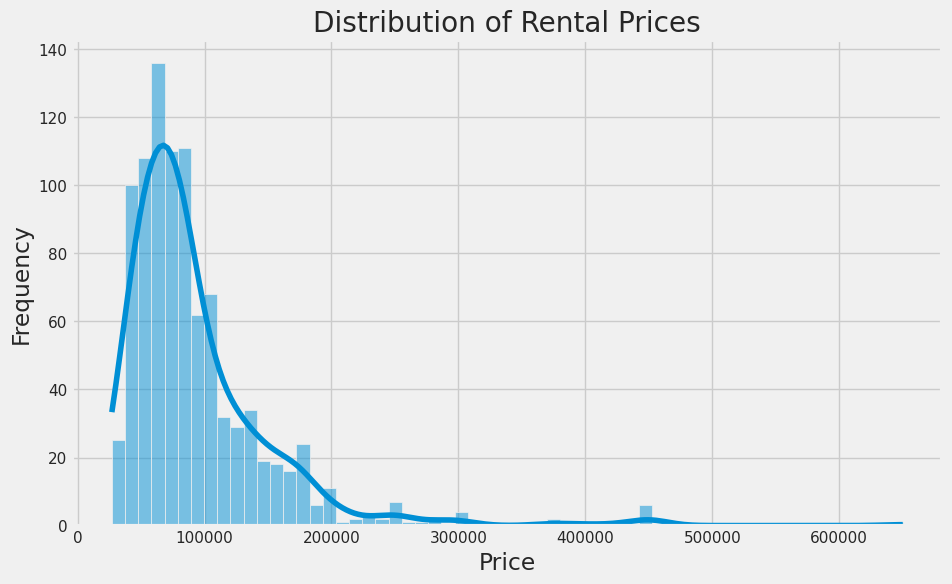

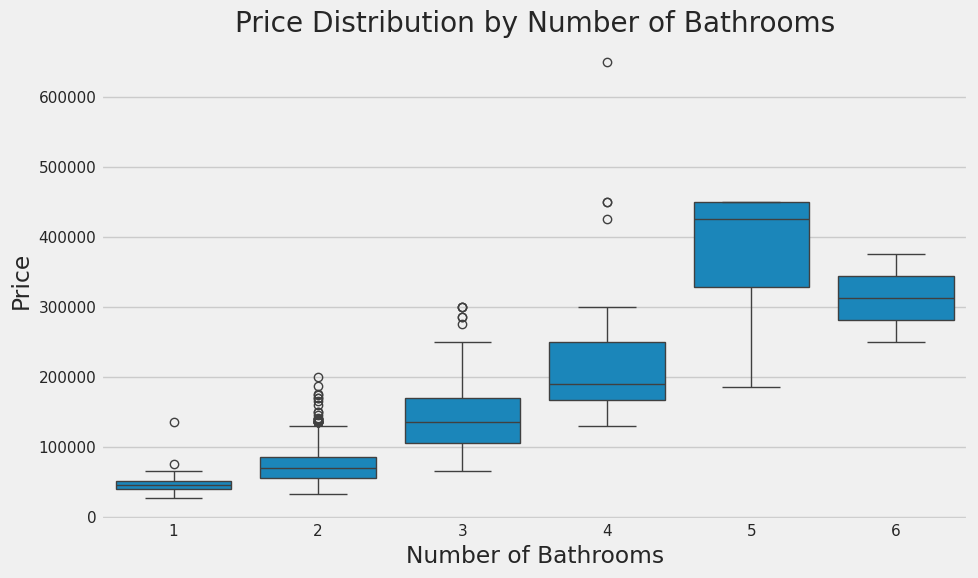

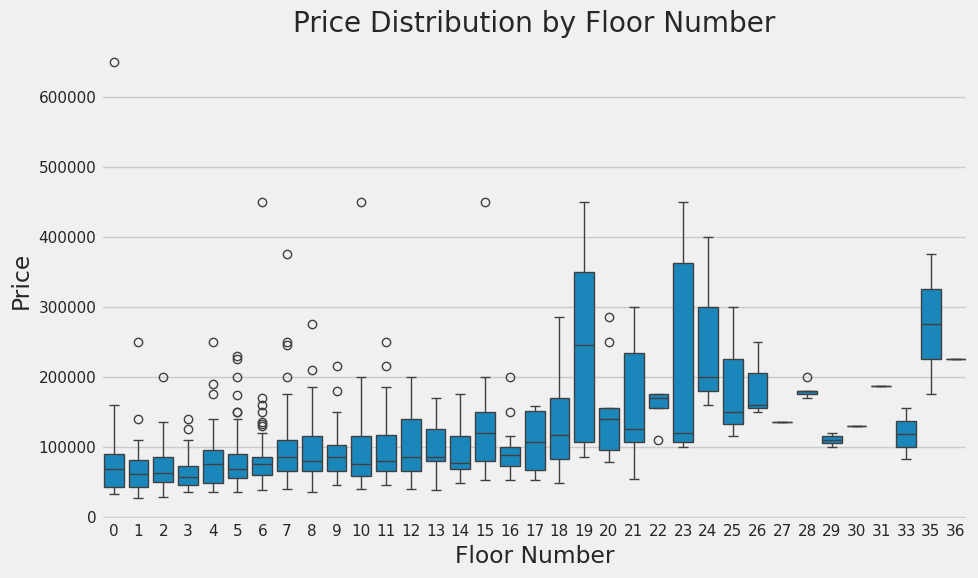

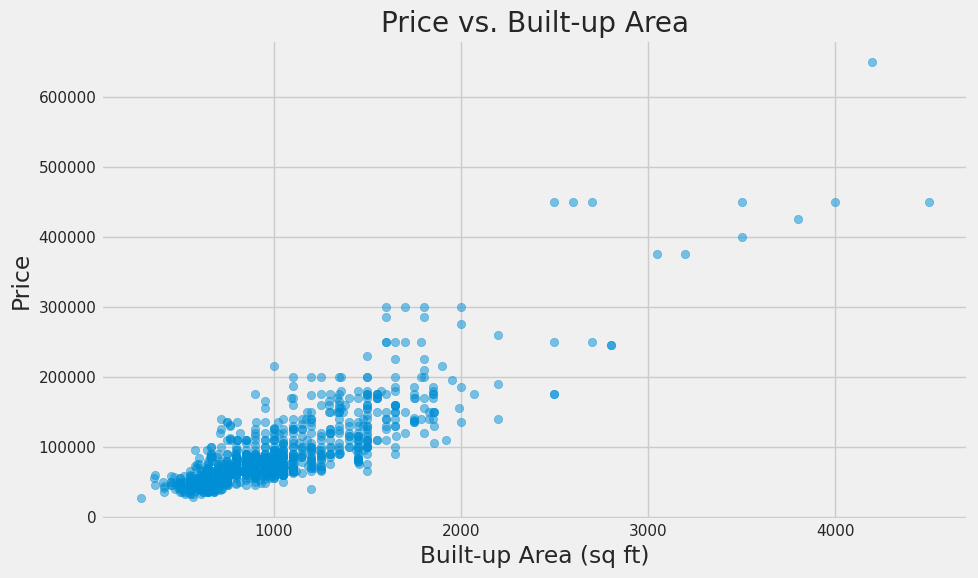

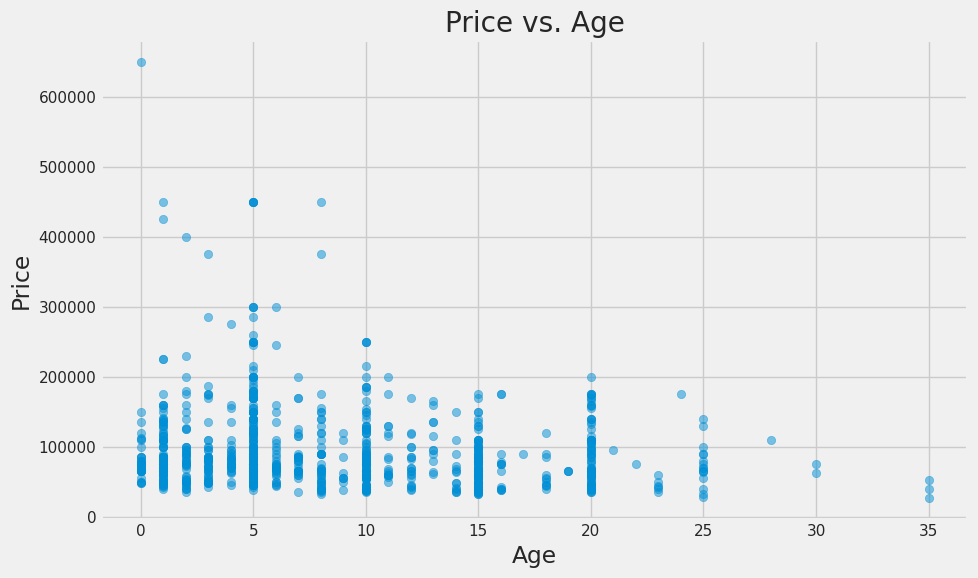

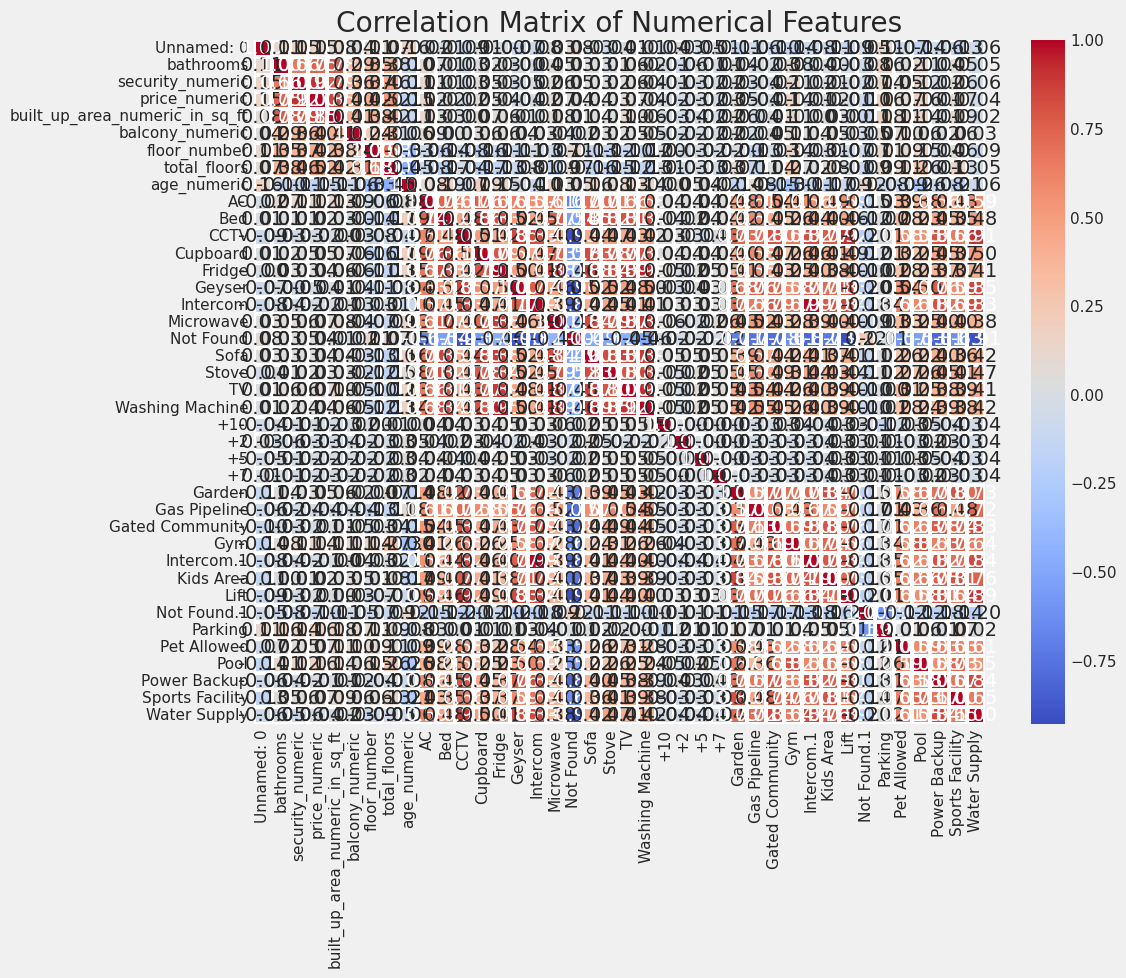



Data Preprocessing
Handling missing values...
Training set size: (754, 41)
Test set size: (189, 41)


In [ ]:
# Set display options
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")
plt.style.use('fivethirtyeight')

print("Rental Price Analysis and Prediction")
print("===================================")

df = pd.read_csv('dataset.csv')

# Display basic information
print("\nDataset Overview:")
print("-----------------")
print(f"Shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

print("\nColumn Names:")
print(df.columns.tolist())

print("\nData Types:")
print(df.dtypes)

print("\nSummary Statistics:")
print(df.describe())

print("\nMissing Values:")
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
print(missing_df[missing_df['Missing Values'] > 0])

# Exploratory Data Analysis (EDA)
print("\n\nExploratory Data Analysis")
print("=========================")

# 1. Distribution of housing prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price_numeric'], kde=True)
plt.title('Distribution of Rental Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# 2. Price by number of bathrooms
plt.figure(figsize=(10, 6))
sns.boxplot(x='bathrooms', y='price_numeric', data=df)
plt.title('Price Distribution by Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 3. Price by floor number
plt.figure(figsize=(10, 6))
sns.boxplot(x='floor_number', y='price_numeric', data=df)
plt.title('Price Distribution by Floor Number')
plt.xlabel('Floor Number')
plt.ylabel('Price')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 4. Price vs. Built-up Area
plt.figure(figsize=(10, 6))
plt.scatter(df['built_up_area_numeric_in_sq_ft'], df['price_numeric'], alpha=0.5)
plt.title('Price vs. Built-up Area')
plt.xlabel('Built-up Area (sq ft)')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

# 5. Price vs. Age
plt.figure(figsize=(10, 6))
plt.scatter(df['age_numeric'], df['price_numeric'], alpha=0.5)
plt.title('Price vs. Age')
plt.xlabel('Age')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

# 6. Correlation analysis
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 10))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=1.5, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# Data Preprocessing
print("\n\nData Preprocessing")
print("=================")

# Handle missing values
print("Handling missing values...")
# For this example, we'll use simple imputation strategies

# Identify numerical and categorical columns
numerical_cols = ['bathrooms', 'security_numeric', 'built_up_area_numeric_in_sq_ft',
                 'balcony_numeric', 'floor_number', 'total_floors', 'age_numeric']
categorical_cols = ['furnishing', 'facing']

# Define preprocessing for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define features and target
X = df.drop('price_numeric', axis=1)
y = df['price_numeric']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")



In [ ]:
# Machine Learning Models
print("\n\nMachine Learning Model Training")
print("==============================")

# Define models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test, preprocessor):
    # Create pipeline with preprocessing and model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Cross-validation score
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')

    return {
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2,
        'CV R²': cv_scores.mean(),
        'Pipeline': pipeline
    }

# Evaluate all models
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    results[name] = evaluate_model(model, X_train, X_test, y_train, y_test, preprocessor)
    print(f"  RMSE: {results[name]['RMSE']:.2f}")
    print(f"  R²: {results[name]['R²']:.4f}")
    print(f"  CV R²: {results[name]['CV R²']:.4f}")

# Identify the best model
best_model = max(results.items(), key=lambda x: x[1]['R²'])
print(f"\nBest Model: {best_model[0]} with R² = {best_model[1]['R²']:.4f}")

# Create a comparison dataframe
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'RMSE': [results[model]['RMSE'] for model in results],
    'MAE': [results[model]['MAE'] for model in results],
    'R²': [results[model]['R²'] for model in results],
    'CV R²': [results[model]['CV R²'] for model in results]
})





Machine Learning Model Training
Training Linear Regression...
  RMSE: 18143.81
  R²: 0.9306
  CV R²: 0.8560
Training Ridge Regression...
  RMSE: 18153.78
  R²: 0.9306
  CV R²: 0.8564
Training Random Forest...
  RMSE: 26399.67
  R²: 0.8531
  CV R²: 0.8729
Training Gradient Boosting...
  RMSE: 31905.10
  R²: 0.7855
  CV R²: 0.8795

Best Model: Linear Regression with R² = 0.9306


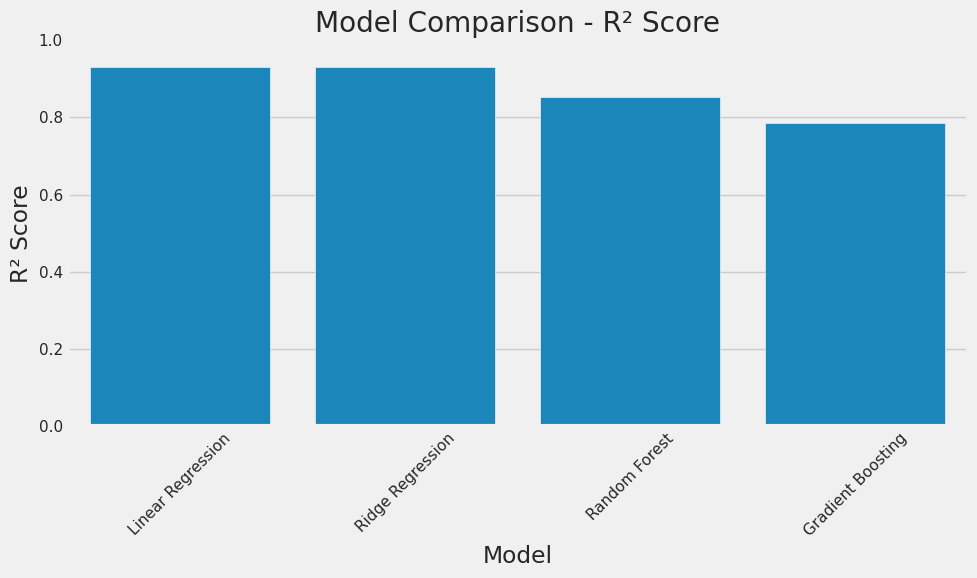

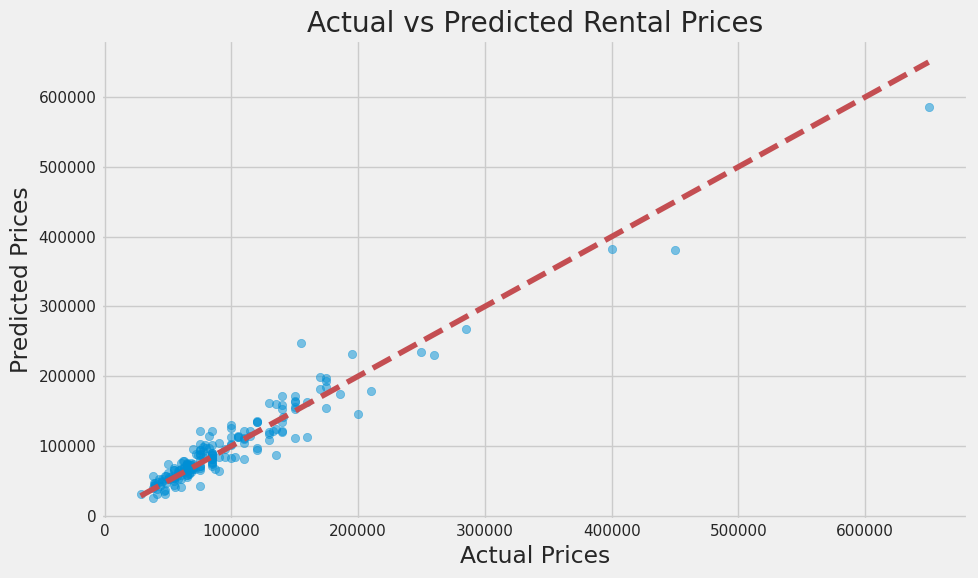

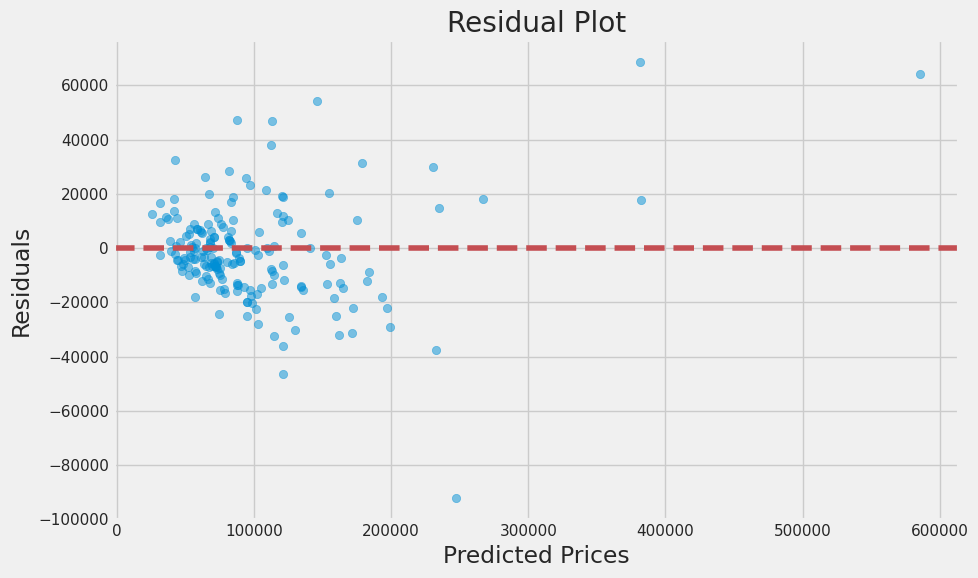

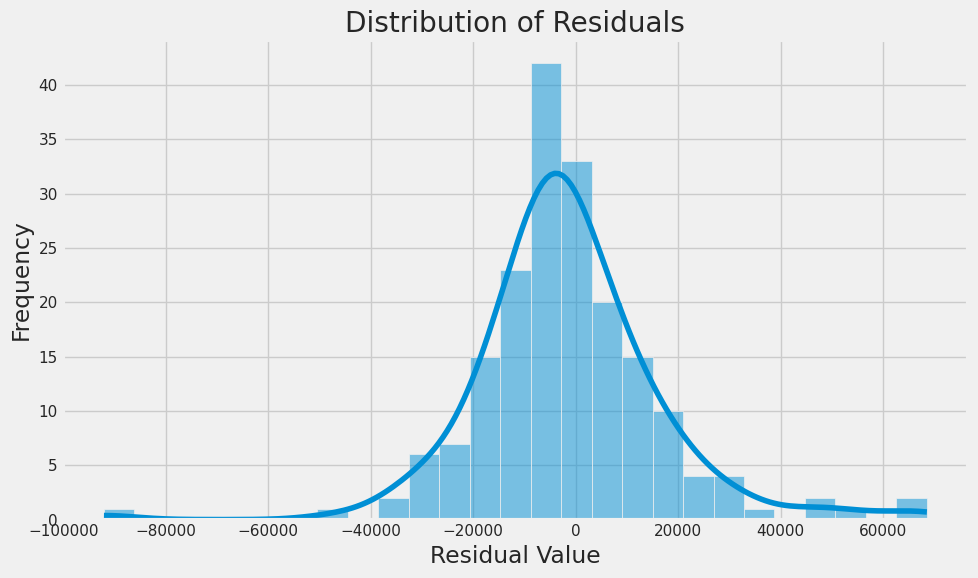



Summary and Insights
1. The best performing model was Linear Regression with an R² score of 0.9306.
2. This model achieved an RMSE of $18143.81, meaning predictions are typically within this amount of the actual price.
3. Key factors influencing rental prices include:
   - Number of bathrooms
   - Built-up area
   - Age of the property
   - Furnishing and facing of the property

4. Geographic insights:
   - No geographic insights available in this dataset

5. Property feature insights:
   - Larger built-up areas command higher prices
   - Newer properties tend to be more expensive
   - Furnished properties may have different price dynamics than unfurnished ones

6. Recommendations for property investors:
   - Focus on properties with larger built-up areas and newer constructions
   - Consider the furnishing and facing of the property when making investment decisions
   - Use the prediction model to identify potentially undervalued properties

7. Limitations of this analysis:
   - The

In [ ]:
# Display model comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R²', data=comparison_df)
plt.title('Model Comparison - R² Score')
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Predictions and Residual Analysis
best_pipeline = best_model[1]['Pipeline']
y_pred = best_pipeline.predict(X_test)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted Rental Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.tight_layout()
plt.show()

# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

# Distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Summary and Insights
print("\n\nSummary and Insights")
print("===================")
print(f"1. The best performing model was {best_model[0]} with an R² score of {best_model[1]['R²']:.4f}.")
print(f"2. This model achieved an RMSE of ${best_model[1]['RMSE']:.2f}, meaning predictions are typically within this amount of the actual price.")
print("3. Key factors influencing rental prices include:")
print("   - Number of bathrooms")
print("   - Built-up area")
print("   - Age of the property")
print("   - Furnishing and facing of the property")

print("\n4. Geographic insights:")
print("   - No geographic insights available in this dataset")

print("\n5. Property feature insights:")
print("   - Larger built-up areas command higher prices")
print("   - Newer properties tend to be more expensive")
print("   - Furnished properties may have different price dynamics than unfurnished ones")

print("\n6. Recommendations for property investors:")
print("   - Focus on properties with larger built-up areas and newer constructions")
print("   - Consider the furnishing and facing of the property when making investment decisions")
print("   - Use the prediction model to identify potentially undervalued properties")

print("\n7. Limitations of this analysis:")
print("   - The model may not capture all market nuances and external economic factors")
print("   - Limited to the features available in the dataset")
print("   - Predictions should be used as one of many decision-making tools, not in isolation")